#**Machine Learning for Digital Fraud Detection**
###Comparing the Performance of Stacking Classifier & Deep Learning Models in Identifying Instances of Digital Transaction Fraud



Brian Morrison

DATA606 - Capstone Project in Data Science

Professor Jay Wang

The University of Maryland, Baltimore County

##**Part Three - Deep Learning Model**

###Introduction & Notebook Overview

The purpose of this notebook is to create, train, and evaluate a Deep Learning Classification Model on our data. Deep Learning is a machine learning approach involving the use of neural networks, large webs of connected nodes with individually tuned activation functions that affect their output, to assess patterns in data features. While adept at discerning discrete interactions between data features, deep learning models require a substantial amount of data to be trained efficiently.

One important consideration here is that, unlike some other classification or dimensionality reduction models used in the previous notebook like Logistic Regression or PCA, Deep Learning is not distance-based and therefore does not require the robust feature scaling covered in our EDA & Dataset Preparation notebook. While the same cleaned and scaled data that was used for the Stacking Classifier will be used for the Deep Learning model for continuity, it would be possible to use unscaled features for this model.

####**Importing Data**

#####SMOTE Data

In [17]:
#our data imports will leverage the same code as the previous notebook

import numpy as np
import pandas as pd

SMOTE_train_df_dict = {} 
SMOTE_train_df_list = ['SMOTE_train_data1', 'SMOTE_train_data2', 'SMOTE_train_data3']

for df in SMOTE_train_df_list:
  df_url = 'https://raw.githubusercontent.com/briancmorrison/brian_data606/main/Data/Cleaned/SMOTE/' + df + '.csv' 
  df_name = 'SMOTE_train_df' + df[16]
  SMOTE_train_df_dict[df_name] = pd.read_csv(df_url, index_col = 0)

In [18]:
test_url = 'https://raw.githubusercontent.com/briancmorrison/brian_data606/main/Data/Cleaned/test_data.csv'
test_df = pd.read_csv(test_url)
test_df = test_df.drop('Unnamed: 0', axis = 1) #removing first index column, which was carried over

In [19]:
SMOTE_train_df = pd.concat(SMOTE_train_df_dict.values(), ignore_index = True)
SMOTE_train_df.head()

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C12,C13,C14,C,H,R,S,W,TransactionDT_mmscaler,isFraud
0,0.003656,0.000427,0.000351,0.0,0.000000,0.0,0.000888,0.000000,0.0000,0.014286,...,0.000000,0.004112,0.0014,0,0,0,0,1,0.532154,0
1,0.002355,0.000213,0.000176,0.0,0.000444,0.0,0.000444,0.000443,0.0003,0.000000,...,0.000314,0.000343,0.0007,1,0,0,0,0,0.038185,0
2,0.003029,0.000213,0.000176,0.0,0.000000,0.0,0.000444,0.000000,0.0000,0.004762,...,0.000000,0.000000,0.0000,0,0,0,0,1,0.048856,0
3,0.003342,0.000427,0.000176,0.0,0.000000,0.0,0.000888,0.000000,0.0000,0.009524,...,0.000000,0.001028,0.0014,0,0,0,0,1,0.536695,0
4,0.001558,0.000213,0.000176,0.0,0.000444,0.0,0.000444,0.000000,0.0003,0.000000,...,0.000000,0.000343,0.0007,0,1,0,0,0,0.251057,0


In [20]:
len(SMOTE_train_df)

797828

#####ROS Data

In [21]:
ROS_train_df_dict = {} 
ROS_train_df_list = ['ROS_train_data1', 'ROS_train_data2', 'ROS_train_data3']

for df in ROS_train_df_list:
  df_url = 'https://raw.githubusercontent.com/briancmorrison/brian_data606/main/Data/Cleaned/ROS/' + df + '.csv' 
  df_name = 'ROS_train_df' + df[14]
  ROS_train_df_dict[df_name] = pd.read_csv(df_url, index_col = 0)

In [22]:
ROS_train_df = pd.concat(ROS_train_df_dict.values(), ignore_index = True)
ROS_train_df.head()

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C12,C13,C14,C,H,R,S,W,TransactionDT_mmscaler,isFraud
0,0.003656,0.000427,0.000351,0.0,0.000000,0.0,0.000888,0.000000,0.0000,0.014286,...,0.000000,0.004112,0.0014,0,0,0,0,1,0.532154,0
1,0.002355,0.000213,0.000176,0.0,0.000444,0.0,0.000444,0.000443,0.0003,0.000000,...,0.000314,0.000343,0.0007,1,0,0,0,0,0.038185,0
2,0.003029,0.000213,0.000176,0.0,0.000000,0.0,0.000444,0.000000,0.0000,0.004762,...,0.000000,0.000000,0.0000,0,0,0,0,1,0.048856,0
3,0.003342,0.000427,0.000176,0.0,0.000000,0.0,0.000888,0.000000,0.0000,0.009524,...,0.000000,0.001028,0.0014,0,0,0,0,1,0.536695,0
4,0.001558,0.000213,0.000176,0.0,0.000444,0.0,0.000444,0.000000,0.0003,0.000000,...,0.000000,0.000343,0.0007,0,1,0,0,0,0.251057,0


In [23]:
len(ROS_train_df)

797828

####**Defining Variables & Splitting Data**

In [24]:
y_train_SMOTE = SMOTE_train_df.pop('isFraud')
X_train_SMOTE = SMOTE_train_df.to_numpy()

y_train_ROS = ROS_train_df.pop('isFraud')
X_train_ROS = ROS_train_df.to_numpy()

y_test = test_df.pop('isFraud')
X_test = test_df.to_numpy()

####**Building Deep Learning Model**

Prior to creating our Deep Learning model, it is important to consider the significant role that widely available, pre-trained models have on this space. Transfer Learning is a process by which pre-trained models with existing node weights are imported, edited to align with data input and output parameters, and trained on the relevant dataset. This method of implementing Deep Learning often shows higher performance in both classification and regression problems, as the models are exposed to exponentially higher volumes of data and may be less susceptible to common challenges such as overfitting to training data.

For this project, we will create a simple Deep Learning model comprised of 4 distinct layers of fully connected nodes. These layers are detailed below:

* *Input Layer* - An input layer expecting a flattened array of 21 distinct features to be passed through it.
* *First Dense Layer* - A dense layer of 64 neurons, in which each neuron receives input from each neuron in the preceding layer. The activation function is specified as relu, or Rectified Linear Unit, a linear activation function that outputs its input if it is positive or zero if it is negative.
* *Second Dense Layer* - An identical dense layer to the previous layer, comprised of 64 neurons that receive input from all neurons in the preceding layer. The relu activation function is again used to determine neuron outputs. 
* *Output Layer* - A final dense layer producing a single output informing the class label prediction. This layer employs a sigmoid activation function, which is a non-linear activation function that produces a value between zero and one representing the probability that the class prediction is not zero.

In [25]:
#we will use keras, a popular deep learning library within tensorflow, to create our model

import tensorflow as tf
from tensorflow import keras

dl_model_SMOTE = keras.Sequential([keras.layers.Flatten(input_shape = (21,)), #the shape of our data, which is stored as an array of 21 features
                 keras.layers.Dense(64, activation = tf.nn.relu), #two dense layers employing relu activation functions
	               keras.layers.Dense(64, activation = tf.nn.relu),
                 keras.layers.Dense(1, activation = tf.nn.sigmoid)]) #model output, a single binary class label prediction

dl_model_ROS =   keras.Sequential([keras.layers.Flatten(input_shape = (21,)), 
                 keras.layers.Dense(64, activation = tf.nn.relu), 
	               keras.layers.Dense(64, activation = tf.nn.relu),
                 keras.layers.Dense(1, activation = tf.nn.sigmoid)])

We will now compile our model, with a few important hyperparameters. A brief overview of these hyperparameters is included below:

* *Adam Optimizer* - Adam is an optimization function used to determine the rate at which network weights are adjusted based on training data, adapting learning weights bassed on calculations using the gradient of the loss function.
* *Binary Crossentropy Loss Function* - Binary Crossentropy is a loss function used in binary classification tasks, calculating a loss score based on the distance between actual class labels and predicted class labels.
* *Accuracy Metric* - As was discussed in the previous notebook, accuracy is not a meaningful metric to consider in binary classification problems. We will leverage a unique Keras metric, binary accuracy, to assess the effectiveness of our models in this project.

In [26]:
dl_model_SMOTE.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy']) 

dl_model_ROS.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy']) 

####**Model Fitting & Evaluation**

#####SMOTE

In [11]:
dl_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE, epochs = 5, batch_size = 1)

Epoch 1/5
797828/797828 [==============================] - 1263s 2ms/step - loss: 0.5174 - binary_accuracy: 0.7339
Epoch 2/5
797828/797828 [==============================] - 1272s 2ms/step - loss: 0.4677 - binary_accuracy: 0.7667
Epoch 3/5
797828/797828 [==============================] - 1280s 2ms/step - loss: 0.4525 - binary_accuracy: 0.7791
Epoch 4/5
797828/797828 [==============================] - 1238s 2ms/step - loss: 0.4486 - binary_accuracy: 0.7803
Epoch 5/5
797828/797828 [==============================] - 1230s 2ms/step - loss: 0.4490 - binary_accuracy: 0.7793


In [12]:
test_loss, test_acc = dl_model_SMOTE.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

5537/5537 [==============================] - 7s 1ms/step - loss: 0.4001 - binary_accuracy: 0.8638
Test loss: 0.40013277530670166
Test accuracy: 0.8637630939483643


Similar to the previous notebook, our accuracy seems relatively high - though this does not portray the full story of model success. In order to assess the effectiveness of the model, we will need to examine its predictions based on an unseen testing datset.

In [13]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

#because we used a sigmod activation function, which outputs probabalistic values between 0 and 1, we'll need to set a threshold (0.5) to separate class predictions
predictions = dl_model_SMOTE.predict(X_test) > 0.5 #generating predictions
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

       False       0.87      0.99      0.93    150975
        True       0.67      0.16      0.25     26187

    accuracy                           0.86    177162
   macro avg       0.77      0.57      0.59    177162
weighted avg       0.84      0.86      0.83    177162



In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def show_classification_matrix(y_true, y_pred): #using the same helper function as the previous notebook
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot = True, fmt = "0")
  ax = plt.gca()
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")

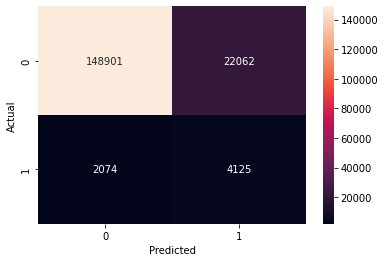

In [15]:
show_classification_matrix(y_test, predictions) #showing classification matrix

#####ROS

In [27]:
dl_model_ROS.fit(X_train_ROS, y_train_ROS, epochs = 5, batch_size = 1)

Epoch 1/5
797828/797828 [==============================] - 1303s 2ms/step - loss: 0.5267 - binary_accuracy: 0.7293
Epoch 2/5
797828/797828 [==============================] - 1334s 2ms/step - loss: 0.4876 - binary_accuracy: 0.7565
Epoch 3/5
797828/797828 [==============================] - 1329s 2ms/step - loss: 0.4810 - binary_accuracy: 0.7620
Epoch 4/5
797828/797828 [==============================] - 1324s 2ms/step - loss: 0.4774 - binary_accuracy: 0.7649
Epoch 5/5
797828/797828 [==============================] - 1306s 2ms/step - loss: 0.4748 - binary_accuracy: 0.7665


In [28]:
test_loss, test_acc = dl_model_ROS.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

5537/5537 [==============================] - 7s 1ms/step - loss: 0.4940 - binary_accuracy: 0.7907
Test accuracy: 0.7906944155693054


In [29]:
predictions = dl_model_ROS.predict(X_test) > 0.5 #generating predictions
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

       False       0.79      0.99      0.88    137092
        True       0.74      0.11      0.20     40070

    accuracy                           0.79    177162
   macro avg       0.77      0.55      0.54    177162
weighted avg       0.78      0.79      0.73    177162



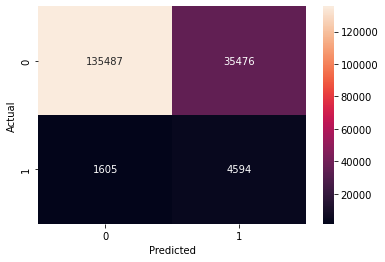

In [30]:
show_classification_matrix(y_test, predictions) #showing classification matrix